In [2]:
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
for i in cnat ssid dcyl; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/${i}_annotation/annotate_results/
    bioawk -c fastx '{ print $name, length($seq) }' \
        < *.cds-transcripts.fa \
        > ${i}_isoform_lengths.tab
done

In [ ]:
for i in ["cnat", "dcyl", "ssid"]:
    tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/" + i + "_annotation/annotate_results/" + i + "_isoform_lengths.tab", 
                sep = "\t", names = ["ISOFORM", "LENGTH"])
    tmp["GENE"] = tmp['ISOFORM'].str.split('-', 1, expand=True)[0]
    tmp = tmp.sort_values(["GENE", "LENGTH"]).reset_index(drop=True)
    tmp["len/3"] = tmp["LENGTH"] / 3 
    tmp["len/3"] = tmp["len/3"].astype(str)
    tmp = tmp[tmp["len/3"].str.contains("\.0")].reset_index(drop=True)
    tmp = tmp.drop_duplicates("GENE", keep = "last").reset_index(drop=True)
    tmp.set_index("GENE").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/" + i + "_annotation/annotate_results/" + i + "_longest_isoform_list.tab",
                                 sep = "\t")

In [ ]:
%%bash
source ~/.bashrc
conda activate base
for i in cnat ssid dcyl; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/${i}_annotation/annotate_results/
    seqtk subseq *.cds-transcripts.fa <( cut -f2 ${i}_longest_isoform_list.tab ) > ${i}.longest-cds-transcripts.fa
done

In [ ]:
%%bash
for i in cnat dcyl ssid; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/
    if [ "${i}" == "cnat" ]; then
        cat ./wgd_pipeline.sh | sed "s/tmpspot/${i}/g" \
            | sed "s/tmpspecies/Colpophyllia_natans/g" > ./tmp.sh
        sbatch ./tmp.sh
    elif [ "${i}" == "dcyl" ]; then
        cat ./wgd_pipeline.sh | sed "s/tmpspot/${i}/g" \
            | sed "s/tmpspecies/Dendrogyra_cylindrus/g" > ./tmp.sh
        sbatch ./tmp.sh
    elif [ "${i}" == "ssid" ]; then
        cat ./wgd_pipeline.sh | sed "s/tmpspot/${i}/g" \
            | sed "s/tmpspecies/Siderastrea_siderea/g" > ./tmp.sh
        sbatch ./tmp.sh
    fi
done
cat ./tmp.sh

In [3]:
!cat ../wgd_pipeline.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=20
#SBATCH --mem=128GB
#SBATCH --time=48:00:00
#SBATCH --job-name=wgd

source ~/.bashrc
conda activate wgd_working
mkdir -p /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/tmpspot_longest_only
mkdir -p ./tmp
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/tmpspot_longest_only

wgd mcl --cds --mcl \
    -s /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/tmpspot_annotation/annotate_results/tmpspot.longest-cds-transcripts.fa \
    -o ./ -n 20

wgd ksd -o ./ -n 20 \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/tmpspot_longest_only/tmpspot.longest-cds-transcripts.fa.blast.tsv.mcl \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/tmpspot_annotation/annotate_results/tmpspot.longest-cds-transcripts.fa


In [ ]:
%%bash
for i in cnat dcyl ssid; do
    cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/
    if [ "${i}" == "cnat" ]; then
        cat ./wgd_anchor_points.sh | sed "s/tmpspot/${i}/g" \
            | sed "s/tmpspecies/Colpophyllia_natans/g" > ./tmp.sh
        sbatch ./tmp.sh
    elif [ "${i}" == "dcyl" ]; then
        cat ./wgd_anchor_points.sh | sed "s/tmpspot/${i}/g" \
            | sed "s/tmpspecies/Dendrogyra_cylindrus/g" > ./tmp.sh
        sbatch ./tmp.sh
    elif [ "${i}" == "ssid" ]; then
        cat ./wgd_anchor_points.sh | sed "s/tmpspot/${i}/g" \
            | sed "s/tmpspecies/Siderastrea_siderea/g" > ./tmp.sh
        sbatch ./tmp.sh
    fi
done
cat ./tmp.sh

In [2]:
!cat ../wgd_anchor_points.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=20
#SBATCH --mem=128GB
#SBATCH --time=48:00:00
#SBATCH --job-name=wgd

source ~/.bashrc
conda activate wgd_working
mkdir -p /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/tmpspot_longest_only
mkdir -p ./tmp
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/tmpspot_longest_only

wgd syn  \
    -f mRNA \
    -a ID \
    -ks /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/tmpspot_longest_only/tmpspot.longest-cds-transcripts.fa.ks.tsv \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/tmpspot_annotation/annotate_results/tmpspecies.gff3 \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/tmpspot_longest_only/tmpspot.longest-cds-transcripts.fa.blast.tsv.mcl


In [5]:
from matplotlib.lines import Line2D

/tmp/ipykernel_983204/3696094341.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_ssid = ks_ssid[ks_ssid["Ks"] < 5][ks_ssid["Ks"] > 0.001].reset_index()
/tmp/ipykernel_983204/3696094341.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_dcyl = ks_dcyl[ks_dcyl["Ks"] < 5][ks_dcyl["Ks"] > 0.001].reset_index()
/tmp/ipykernel_983204/3696094341.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_cnat = ks_cnat[ks_cnat["Ks"] < 5][ks_cnat["Ks"] > 0.001].reset_index()


<Figure size 640x480 with 0 Axes>

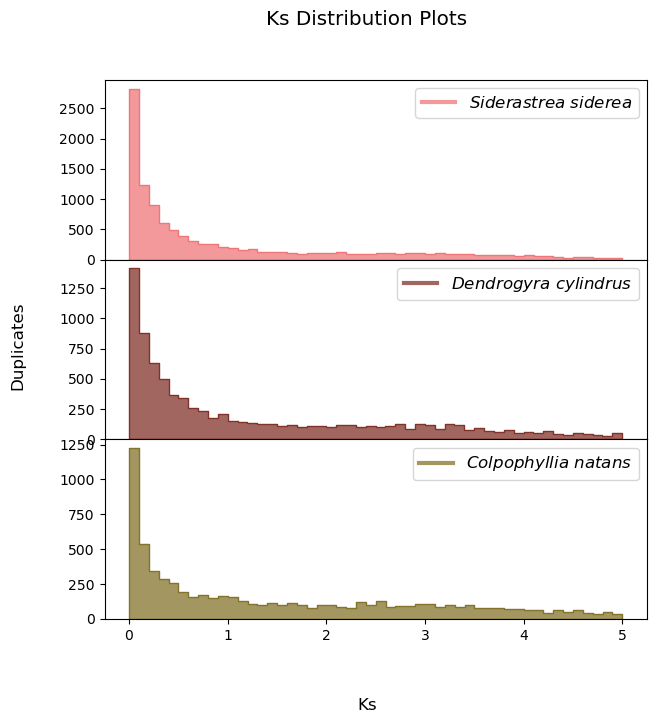

In [16]:
plt.rcParams['pdf.fonttype'] = 42
plt.figure()
fig, axes = plt.subplots(3, 1, figsize=(7,7), sharey=False, sharex = True)

ks_ssid = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/ssid_longest_only/ssid.longest-cds-transcripts.fa.ks.tsv", 
            sep = "\t")
ks_ssid = ks_ssid[ks_ssid["Ks"] < 5][ks_ssid["Ks"] > 0.001].reset_index()
ks_ssid = ks_ssid.groupby(['Family', 'Node']).mean("Ks").reset_index()
sns.histplot(ks_ssid["Ks"][ks_ssid["Ks"] < 5][ks_ssid["Ks"] > 0], bins = 50, ax=axes[0], 
             color = "#EF767A", element="step")

ks_dcyl = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/dcyl_longest_only/dcyl.longest-cds-transcripts.fa.ks.tsv", 
            sep = "\t")
ks_dcyl = ks_dcyl[ks_dcyl["Ks"] < 5][ks_dcyl["Ks"] > 0.001].reset_index()
ks_dcyl = ks_dcyl.groupby(['Family', 'Node']).mean("Ks").reset_index()
sns.histplot(ks_dcyl["Ks"][ks_dcyl["Ks"] < 5][ks_dcyl["Ks"] > 0], bins = 50, ax=axes[1], 
             color = "#823329", element="step")

ks_cnat = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/wgddetector/cnat_longest_only/cnat.longest-cds-transcripts.fa.ks.tsv", 
            sep = "\t")
ks_cnat = ks_cnat[ks_cnat["Ks"] < 5][ks_cnat["Ks"] > 0.001].reset_index()
ks_cnat = ks_cnat.groupby(['Family', 'Node']).mean("Ks").reset_index()
sns.histplot(ks_cnat["Ks"][ks_cnat["Ks"] < 5][ks_cnat["Ks"] > 0], bins = 50, ax=axes[2], 
             color = "#84732B", element="step")

axes[0].set(xlabel = None, ylabel = None)
axes[1].set(xlabel = None, ylabel = None)
axes[2].set(xlabel = None, ylabel = None)
fig.text(0.5, -0.02, 
         'Ks', 
         ha='center',
         fontsize = 'large')
fig.text(-0.01, 0.5, 
         'Duplicates', 
         va='center', 
         rotation='vertical',
         fontsize = 'large')

custom_lines1 = [Line2D([0], [0], color = "#EF767A", lw=3, alpha = 0.75)]
custom_lines2 = [Line2D([0], [0], color = "#823329", lw=3, alpha = 0.75)]
custom_lines3 = [Line2D([0], [0], color = "#84732B", lw=3, alpha = 0.75)]

axes[0].legend(custom_lines1, [r'$\it{Siderastrea}$ $\it{siderea}$'], 
               fontsize = 'large')
axes[1].legend(custom_lines2, [r'$\it{Dendrogyra}$ $\it{cylindrus}$'], 
               fontsize = 'large')
axes[2].legend(custom_lines3, [r'$\it{Colpophyllia}$ $\it{natans}$'], 
               fontsize = 'large')

plt.subplots_adjust(hspace=0)

plt.suptitle("Ks Distribution Plots", size = "x-large")

plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/ks_plot.pdf",
            bbox_inches='tight',
            dpi = 300)
plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/ks_plot.png",
            bbox_inches='tight',
            dpi = 300)

We're going to use OrthoFinder to find gene families that have considerably expanded in Ssid (and the other species), using Nematostella as an outgroup (https://www.ncbi.nlm.nih.gov/genome/230):

In [ ]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/
wget -O pmea.faa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/045/GCA_942486045.1_PMEA_v1/GCA_942486045.1_PMEA_v1_protein.faa.gz
wget -O pver.faa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/030/620/025/GCF_030620025.1_CSIRO_AGI_Pver_v1/GCF_030620025.1_CSIRO_AGI_Pver_v1_protein.faa.gz
wget -O plob.faa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/035/GCA_942486035.1_PLOB_v1/GCA_942486035.1_PLOB_v1_protein.faa.gz
wget -O pcom.faa.gz http://cyanophora.rutgers.edu/porites_compressa/Porites_compressa_HIv1.genes.pep.faa.gz
wget -O ofav.faa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/042/975/GCF_002042975.1_ofav_dov_v1/GCF_002042975.1_ofav_dov_v1_protein.faa.gz
wget -O spis.faa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/571/385/GCF_002571385.2_Stylophora_pistillata_v1.1/GCF_002571385.2_Stylophora_pistillata_v1.1_protein.faa.gz
wget -O amil.faa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/013/753/865/GCF_013753865.1_Amil_v2.1/GCF_013753865.1_Amil_v2.1_protein.faa.gz
wget -O mcap.faa.gz http://cyanophora.rutgers.edu/montipora/Montipora_capitata_HIv3.genes.pep.faa.gz
wget -O afen.faa.gz http://corallimorpharia.reefgenomics.org/download/afen.prot.fa.gz
wget -O dspp.faa.gz http://corallimorpharia.reefgenomics.org/download/dspp.prot.fa.gz
wget -O ffun.faa.gz http://ffun.reefgenomics.org/download/ffun_1.0.proteins.fasta.gz
wget -O gasp.faa.gz http://gasp.reefgenomics.org/download/gasp_1.0.proteins.fasta.gz
wget -O alor.faa.gz http://alor.reefgenomics.org/download/Acropora_loripes_predicted_proteins_v1.pep.fasta.gz
wget -O pdae.faa.gz http://pdae.reefgenomics.org/download/pdae_prots.v1.fa.gz
wget -O dper.faa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/204/205/GCA_029204205.1_Loph_1.0/GCA_029204205.1_Loph_1.0_protein.faa.gz
wget -O gfas.faa.gz http://gfas.reefgenomics.org/download/gfas_1.0.proteins.fasta.gz
wget -O plut.faa.gz http://plut.reefgenomics.org/download/plut2v1.1.proteins.fasta.gz
gunzip ./*.faa.gz

In [ ]:
%%bash
ln -s /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/cnat_annotation/annotate_results/Colpophyllia_natans.proteins.fa \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/cnat.faa
ln -s /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/ssid_annotation/annotate_results/Siderastrea_siderea.proteins.fa \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/ssid.faa
ln -s /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/dcyl_annotation/annotate_results/Dendrogyra_cylindrus.proteins.fa \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/dcyl.faa
ln -s /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/acer_lepwrap_annotation/annotate_results/Acropora_cervicornis.proteins.fa \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/acer.faa
ln -s /storage/group/ibb3/default/AP_AC_genome_seqs/dovetail_Apalm/HiC_improvement/Apalm_assembly_v3.1_200911.protein.fasta \
    /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/apal.faa

In [ ]:
%%bash
source ~/.bashrc
conda activate orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final
for ncbi_genome in pver ofav spis amil; do
    python /storage/group/ibb3/default/.conda/envs/orthofinder/bin/primary_transcript.py ./${ncbi_genome}.faa
done

In [ ]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final
wget -O dper.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/204/205/GCA_029204205.1_Loph_1.0/GCA_029204205.1_Loph_1.0_genomic.gff.gz
wget -O dper.fa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/029/204/205/GCA_029204205.1_Loph_1.0/GCA_029204205.1_Loph_1.0_genomic.fna.gz
wget -O plob.fa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/035/GCA_942486035.1_PLOB_v1/GCA_942486035.1_PLOB_v1_genomic.fna.gz
wget -O plob.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/035/GCA_942486035.1_PLOB_v1/GCA_942486035.1_PLOB_v1_genomic.gff.gz
wget -O pmea.fa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/045/GCA_942486045.1_PMEA_v1/GCA_942486045.1_PMEA_v1_genomic.fna.gz
wget -O pmea.gff.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/942/486/045/GCA_942486045.1_PMEA_v1/GCA_942486045.1_PMEA_v1_genomic.gff.gz
wget -O mcap.gff.gz http://cyanophora.rutgers.edu/montipora/Montipora_capitata_HIv3.genes.gff3.gz
wget -O mcap.fa.gz http://cyanophora.rutgers.edu/montipora/Montipora_capitata_HIv3.assembly.fasta.gz
wget -O pcom.gff.gz http://cyanophora.rutgers.edu/porites_compressa/Porites_compressa_HIv1.genes.gff3.gz
wget -O pcom.fa.gz http://cyanophora.rutgers.edu/porites_compressa/Porites_compressa_HIv1.assembly.fasta.gz

The different protein/CDS/gff files all have different formatting, so this next chunk of code is just processing these files such that they can be used in OrthoFinder:

In [ ]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final
gunzip *.fa.gz
gunzip *.gff.gz

In [ ]:
%%bash
source ~/.bashrc
conda activate assembly
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final
for spp in pmea plob dper mcap pcom; do
    gffread \
        -y ./${spp}.faa \
        -g ${spp}.fa \
        ${spp}.gff
done

In [ ]:
%%bash
source ~/.bashrc
conda activate assembly
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/
for spp in apoc apal pmea plob dper pcom mcap afen dspp ffun gasp alor pdae gfas; do
    bioawk -c fastx '{ print $name, length($seq) }' \
        < ${spp}.faa \
        > ${spp}.proteins.lengths
done

In [ ]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/
grep "^>" apoc.faa | sed "s/>//g" > apoc_headers.txt

In [216]:
apoc = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/apoc.proteins.lengths", 
            sep = "\t", names = ["gene", "length"])
apocnames = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/apoc_headers.txt", 
            sep = " ", names = ["gene", "fullname"])
apoc = pd.concat([apoc[["length"]], apocnames], axis = 1)
apoc["geneID"] = apoc["fullname"].str.split("|", n = 3, expand = True)[1]
apoc = apoc.sort_values(["geneID", "length"], ascending = [False, False]).reset_index(drop=True)
apoc = apoc.drop_duplicates("geneID").reset_index(drop=True)
apoc["fullname"] = apoc["gene"] + " " + apoc["fullname"]
apoc[["fullname"]].set_index("fullname").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/apoc_keep_list.txt", 
                             header = None)

In [ ]:
for spp in ["pmea", "plob"]:
    globals()[spp] = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + 
                                 spp + ".proteins.lengths", 
            sep = "\t", names = ["gene", "length"])
    globals()[spp]["ID"] = globals()[spp]["gene"].str.split("-", n = 1, expand = True)[1]
    globals()[spp] = (globals()[spp].sort_values(["ID", "length"], ascending = False)
            .drop_duplicates(["ID"], keep = "first").reset_index(drop=True))
    globals()[spp][["gene"]].set_index("gene").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + spp + '_keep_list.txt', 
                             header = None)

In [ ]:
for spp in ["dper"]:
    globals()[spp] = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + 
                                 spp + ".proteins.lengths", 
            sep = "\t", names = ["gene", "length"])
    globals()[spp]["ID"] = globals()[spp]["gene"].str.split("|", n = 6, expand = True)[2].str.split("-", n = 6, expand = True)[0]
    globals()[spp] = (globals()[spp].sort_values(["ID", "length"], ascending = False)
            .drop_duplicates(["ID"], keep = "first").reset_index(drop=True))
    globals()[spp][["gene"]].set_index("gene").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + spp + '_keep_list.txt', 
                             header = None)

In [ ]:
for spp in ["pcom", "mcap"]:
    globals()[spp] = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + 
                                 spp + ".proteins.lengths",
            sep = "\t", names = ["gene", "length"])
    globals()[spp]["ID"] = globals()[spp]["gene"].str.split("_", n = 6, expand = True)[5].str.rsplit(".", n = 1, expand = True)[0]
    globals()[spp] = (globals()[spp].sort_values(["ID", "length"], ascending = False)
            .drop_duplicates(["ID"], keep = "first").reset_index(drop=True))
    globals()[spp][["gene"]].set_index("gene").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + spp + '_keep_list.txt', 
                             header = None)

In [ ]:
for spp in ["ffun", 'gfas', 'gasp']:
    globals()[spp] = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + 
                                 spp + ".proteins.lengths",
            sep = "\t", names = ["gene", "length"])
    globals()[spp]["ID"] = globals()[spp]["gene"].str.split(".", expand = True, n = 4)[2]
    globals()[spp] = (globals()[spp].sort_values(["ID", "length"], ascending = False)
            .drop_duplicates(["ID"], keep = "first").reset_index(drop=True))
    globals()[spp][["gene"]].set_index("gene").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + spp + '_keep_list.txt', 
                             header = None)

In [ ]:
for spp in ["alor"]:
    globals()[spp] = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + 
                                 spp + ".proteins.lengths",
            sep = "\t", names = ["gene", "length"])
    globals()[spp]["ID"] = globals()[spp]["gene"].str.split(".", expand = True, n = 1)[0]
    globals()[spp] = (globals()[spp].sort_values(["ID", "length"], ascending = False)
            .drop_duplicates(["ID"], keep = "first").reset_index(drop=True))
    globals()[spp][["gene"]].set_index("gene").to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/" + spp + '_keep_list.txt', 
                             header = None)

In [ ]:
%%bash
source ~/.bashrc
conda activate base
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/
for spp in apal afen dspp pdae; do
    cp ./${spp}.faa \
        ./primary_transcripts/${spp}.faa
done

In [ ]:
%%bash
source ~/.bashrc
conda activate base
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/
for spp in apoc pmea plob dper pcom mcap ffun gasp alor gfas; do
    seqtk subseq \
        ${spp}.faa \
        <( cat ${spp}_keep_list.txt ) \
        > ./primary_transcripts/${spp}.faa
done

In [ ]:
%%bash
source ~/.bashrc
conda activate assembly
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/
bioawk -c fastx '{ print $name, length($seq) }' \
    < ./orthofinder_final/cjar.faa \
    > ./orthofinder_final/cjar.proteins.lengths
bioawk -c fastx '{ print $name, length($seq) }' \
    < ./funannotate_annotation/acer_lepwrap_annotation/annotate_results/Acropora_cervicornis.proteins.fa \
    > ./funannotate_annotation/acer_lepwrap_annotation/annotate_results/Acropora_cervicornis.proteins.lengths
bioawk -c fastx '{ print $name, length($seq) }' \
    < ./funannotate_annotation/cnat_annotation/annotate_results/Colpophyllia_natans.proteins.fa \
    > ./funannotate_annotation/cnat_annotation/annotate_results/Colpophyllia_natans.proteins.lengths
bioawk -c fastx '{ print $name, length($seq) }' \
    < ./funannotate_annotation/dcyl_annotation/annotate_results/Dendrogyra_cylindrus.proteins.fa \
    > ./funannotate_annotation/dcyl_annotation/annotate_results/Dendrogyra_cylindrus.proteins.lengths
bioawk -c fastx '{ print $name, length($seq) }' \
    < ./funannotate_annotation/ssid_annotation/annotate_results/Siderastrea_siderea.proteins.fa \
    > ./funannotate_annotation/ssid_annotation/annotate_results/Siderastrea_siderea.proteins.lengths

In [ ]:
tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/cjar.proteins.lengths", sep = "\t", header = None)
tmp["gene"] = tmp[0].str.split("-", n=2, expand = True)[0]
tmp = tmp.sort_values(["gene", 1], 
                ascending = [True, False]).drop_duplicates(subset = ["gene"], 
                                                           keep = "first").reset_index(drop=True)
tmp[[0]].set_index(0).to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/cjar_longest_protein.txt", 
                             header = None)

In [ ]:
tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/acer_lepwrap_annotation/annotate_results/Acropora_cervicornis.proteins.lengths", sep = "\t", header = None)
tmp["gene"] = tmp[0].str.split("-", n=2, expand = True)[0]
tmp = tmp.sort_values(["gene", 1], 
                ascending = [True, False]).drop_duplicates(subset = ["gene"], 
                                                           keep = "first").reset_index(drop=True)
tmp[[0]].set_index(0).to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/acer_lepwrap_annotation/annotate_results/acer_lepwrap_longest_protein.txt", 
                             header = None)

In [ ]:
tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/cnat_annotation/annotate_results/Colpophyllia_natans.proteins.lengths", sep = "\t", header = None)
tmp["gene"] = tmp[0].str.split("-", n=2, expand = True)[0]
tmp = tmp.sort_values(["gene", 1], 
                ascending = [True, False]).drop_duplicates(subset = ["gene"], 
                                                           keep = "first").reset_index(drop=True)
tmp[[0]].set_index(0).to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/cnat_annotation/annotate_results/cnat_longest_protein.txt", 
                             header = None)

In [ ]:
tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/dcyl_annotation/annotate_results/Dendrogyra_cylindrus.proteins.lengths", sep = "\t", header = None)
tmp["gene"] = tmp[0].str.split("-", n=2, expand = True)[0]
tmp = tmp.sort_values(["gene", 1], 
                ascending = [True, False]).drop_duplicates(subset = ["gene"], 
                                                           keep = "first").reset_index(drop=True)
tmp[[0]].set_index(0).to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/dcyl_annotation/annotate_results/dcyl_longest_protein.txt", 
                             header = None)

In [ ]:
tmp = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/ssid_annotation/annotate_results/Siderastrea_siderea.proteins.lengths", sep = "\t", header = None)
tmp["gene"] = tmp[0].str.split("-", n=2, expand = True)[0]
tmp = tmp.sort_values(["gene", 1], 
                ascending = [True, False]).drop_duplicates(subset = ["gene"], 
                                                           keep = "first").reset_index(drop=True)
tmp[[0]].set_index(0).to_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/ssid_annotation/annotate_results/ssid_longest_protein.txt", 
                             header = None)

In [ ]:
%%bash
source ~/.bashrc
conda activate base
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/

seqtk subseq \
    ../cjar.faa \
    <( cat ../cjar_longest_protein.txt ) \
    > cjar.faa

In [ ]:
%%bash
source ~/.bashrc
conda activate base
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/

for i in acer_lepwrap cnat dcyl ssid; do
    seqtk subseq \
        /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/${i}_annotation/annotate_results/*_*.proteins.fa \
        <( cat /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/${i}_annotation/annotate_results/*_longest_protein.txt ) \
        > ${i}.faa
done

In [ ]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/
mv ./acer_lepwrap.faa ./acer.faa

In [24]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/
cat ./orthofinder.sh
sbatch ./orthofinder.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=16
#SBATCH --mem=100GB
#SBATCH --time=48:00:00
#SBATCH --job-name=orthofinder
#SBATCH --account=ibb3

source ~/.bashrc
conda activate orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/

orthofinder -t 16 -a 16 \
    -f ./primary_transcripts


In [2]:
from upsetplot import from_memberships
from upsetplot import generate_samples
from sklearn.datasets import load_diabetes
from upsetplot import plot
from matplotlib import pyplot
import matplotlib.pyplot as plt
from upsetplot import UpSet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

example_samples_df = generate_samples()

In [90]:
genes = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Phylogenetic_Hierarchical_Orthogroups/N0.GeneCount.csv", sep = "\t")
genes = genes[list(genes.columns[3:])]
genes.columns = [
"Acropora cervicornis",
    "Amplexidiscus fenestrafer",
    "Acropora loripes",
 "Acropora millepora",
    "Acropora palmata",
 "Astrangia poculata",
    "Catalaphyllia jardinei",
 "Colpophyllia natans", 
 "Dendrogyra cylindrus", 
 "Desmophyllum pertusum", 
 "Discosoma spp.", 
 "Fungia fungites",
    "Goniastrea aspera",
 "Galaxea fascicularis",
    "Montipora capitata",
 "Orbicella faveolata", 
 "Porites compressa",
    "Platygyra daedalea",
    "Porites lobata",
    "Pocillopora meandrina",
 "Pocillopora verrucosa",
    "Stylophora pistillata",
 "Siderastrea siderea"]

In [91]:
group_dict={}

for index,row  in genes.iterrows():
    for sp,count in row.items():
        if sp != "total" and count != 0:
            group_dict.setdefault(index, []).append(sp)

In [92]:
x = from_memberships(group_dict.values()).sort_values(ascending= False)
x = pd.DataFrame(x)
x = x.reset_index(drop=False)
x = x[['Goniastrea aspera',
 'Platygyra daedalea',
 'Catalaphyllia jardinei',
 'Orbicella faveolata',
 'Colpophyllia natans',
 'Dendrogyra cylindrus',
 'Astrangia poculata',
 'Fungia fungites',
 'Desmophyllum pertusum',
 'Pocillopora meandrina',
 'Pocillopora verrucosa',
 'Stylophora pistillata',
 'Acropora loripes',
 'Acropora millepora',
 'Acropora cervicornis',
 'Acropora palmata',
 'Montipora capitata',
 'Galaxea fascicularis',
 'Porites lobata',
 'Porites compressa',
 'Siderastrea siderea',
 'Amplexidiscus fenestrafer',
 'Discosoma spp.',
       "ones"]]
x = x.set_index(['Goniastrea aspera',
 'Platygyra daedalea',
 'Catalaphyllia jardinei',
 'Orbicella faveolata',
 'Colpophyllia natans',
 'Dendrogyra cylindrus',
 'Astrangia poculata',
 'Fungia fungites',
 'Desmophyllum pertusum',
 'Pocillopora meandrina',
 'Pocillopora verrucosa',
 'Stylophora pistillata',
 'Acropora loripes',
 'Acropora millepora',
 'Acropora cervicornis',
 'Acropora palmata',
 'Montipora capitata',
 'Galaxea fascicularis',
 'Porites lobata',
 'Porites compressa',
 'Siderastrea siderea',
 'Amplexidiscus fenestrafer',
 'Discosoma spp.'])

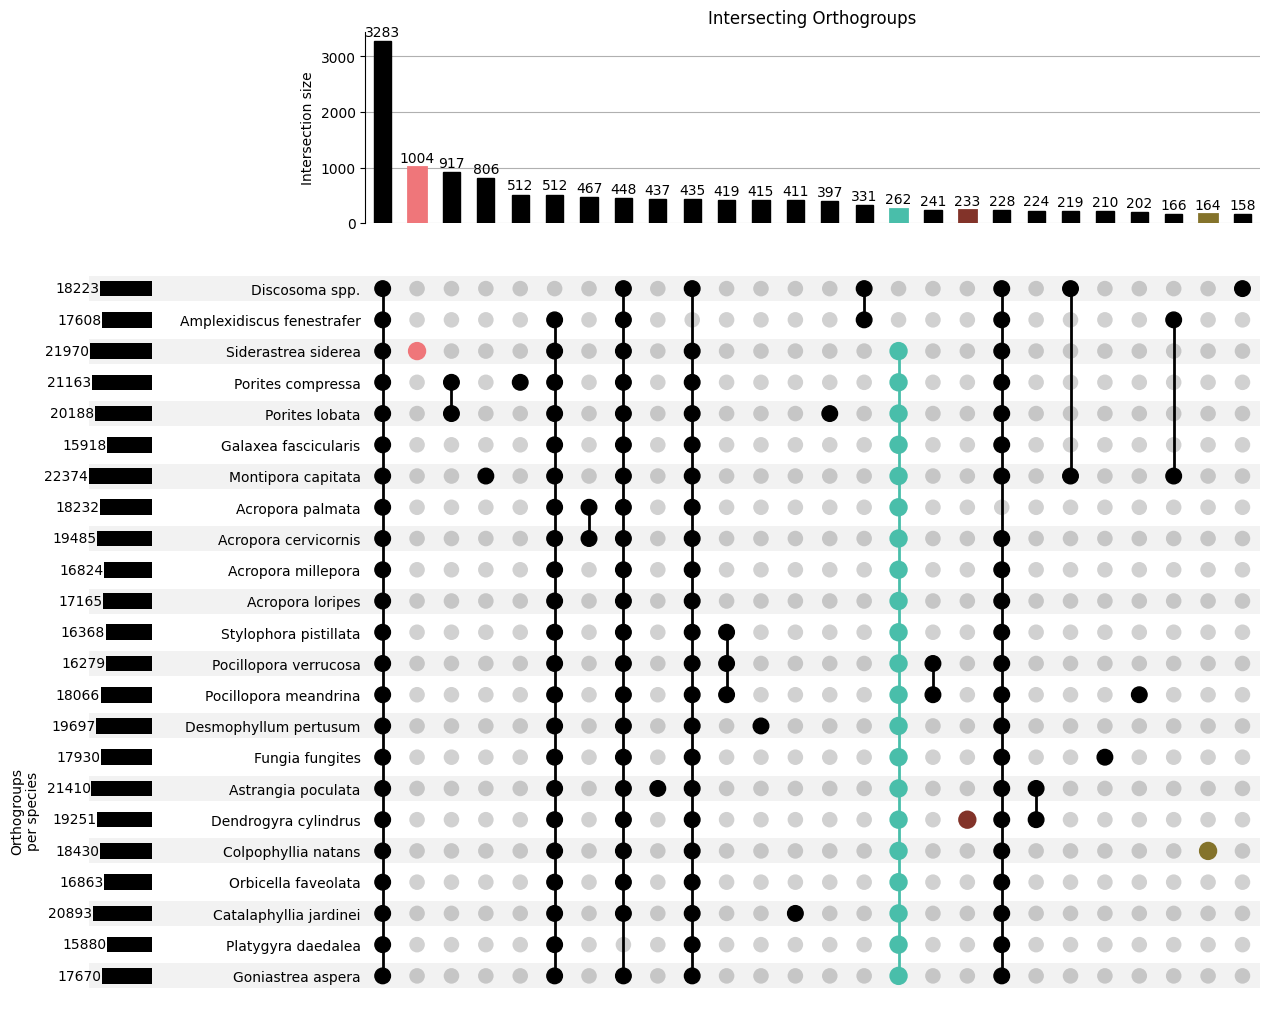

In [94]:
upset = UpSet(x, 
          subset_size='count',
          show_counts=True, 
          sort_by = "cardinality",
          sort_categories_by = "input", 
          min_subset_size=150)
upset.style_subsets(absent=["Discosoma spp.", "Amplexidiscus fenestrafer"], 
                    present = ['Goniastrea aspera',
                             'Platygyra daedalea',
                             'Catalaphyllia jardinei',
                             'Orbicella faveolata',
                             'Colpophyllia natans',
                             'Dendrogyra cylindrus',
                             'Astrangia poculata',
                             'Fungia fungites',
                             'Desmophyllum pertusum',
                             'Pocillopora meandrina',
                             'Pocillopora verrucosa',
                             'Stylophora pistillata',
                             'Acropora loripes',
                             'Acropora millepora',
                             'Acropora cervicornis',
                             'Acropora palmata',
                             'Montipora capitata',
                             'Galaxea fascicularis',
                             'Porites lobata',
                             'Porites compressa',
                             'Siderastrea siderea'], 
                    facecolor = "#49BEAA",
                    edgecolor = "#49BEAA",
                    linewidth = 2)
upset.style_subsets(absent=['Goniastrea aspera',
                         'Platygyra daedalea',
                         'Catalaphyllia jardinei',
                         'Orbicella faveolata',
                         'Colpophyllia natans',
                         'Dendrogyra cylindrus',
                         'Astrangia poculata',
                         'Fungia fungites',
                         'Desmophyllum pertusum',
                         'Pocillopora meandrina',
                         'Pocillopora verrucosa',
                         'Stylophora pistillata',
                         'Acropora loripes',
                         'Acropora millepora',
                         'Acropora cervicornis',
                         'Acropora palmata',
                         'Montipora capitata',
                         'Galaxea fascicularis',
                         'Porites lobata',
                         'Porites compressa',
                         'Amplexidiscus fenestrafer',
                         'Discosoma spp.'], 
                    present = "Siderastrea siderea", 
                    facecolor = "#EF767A",
                    edgecolor = "#EF767A",
                    linewidth = 2)
upset.style_subsets(absent=['Goniastrea aspera',
                         'Platygyra daedalea',
                         'Catalaphyllia jardinei',
                         'Orbicella faveolata',
                         'Colpophyllia natans',
                         'Astrangia poculata',
                         'Fungia fungites',
                         'Desmophyllum pertusum',
                         'Pocillopora meandrina',
                         'Pocillopora verrucosa',
                         'Stylophora pistillata',
                         'Acropora loripes',
                         'Acropora millepora',
                         'Acropora cervicornis',
                         'Acropora palmata',
                         'Montipora capitata',
                         'Galaxea fascicularis',
                         'Porites lobata',
                         'Porites compressa',
                         'Siderastrea siderea',
                         'Amplexidiscus fenestrafer',
                         'Discosoma spp.'], 
                    present = "Dendrogyra cylindrus",
                    facecolor = "#823329",
                    edgecolor = "#823329",
                    linewidth = 2)
upset.style_subsets(absent=['Goniastrea aspera',
                         'Platygyra daedalea',
                         'Catalaphyllia jardinei',
                         'Orbicella faveolata',
                         'Dendrogyra cylindrus',
                         'Astrangia poculata',
                         'Fungia fungites',
                         'Desmophyllum pertusum',
                         'Pocillopora meandrina',
                         'Pocillopora verrucosa',
                         'Stylophora pistillata',
                         'Acropora loripes',
                         'Acropora millepora',
                         'Acropora cervicornis',
                         'Acropora palmata',
                         'Montipora capitata',
                         'Galaxea fascicularis',
                         'Porites lobata',
                         'Porites compressa',
                         'Siderastrea siderea',
                         'Amplexidiscus fenestrafer',
                         'Discosoma spp.'], 
                    present = "Colpophyllia natans", 
                    facecolor = "#84732B",
                    edgecolor = "#84732B",
                    linewidth = 2)


d = upset.plot()
plt.title('Intersecting Orthogroups')
d['totals'].set_title('Orthogroups\nper species', loc = "center", 
                      y = 0.21, x = -1,
                      pad = 6, rotation='vertical', 
                      fontdict = {'fontsize': 10,
                                  'verticalalignment': 'baseline'})
d['totals'].axis('off')
plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/figures/orthogroups_summary.pdf", dpi = 300)
plt.savefig("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/figures/orthogroups_summary.png", dpi = 300) 

In [3]:
import toytree
import toyplot
import numpy as np
import pandas as pd

In [15]:
%%bash
source ~/.bashrc
conda activate py2
python ../prep_r8s.py \
    -i ../orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Species_Tree/SpeciesTree_rooted.txt \
    -o ../r8s_input.txt \
    -s 32695 \
    -p 'acer,apal' \
    -c 5.3


Running cafetutorial_clade_and_size_filter.py as a standalone...



In [ ]:
%%bash
source ~/.bashrc
conda activate orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/r8s1.81/src/
./r8s \
    -b -f /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/r8s_input.txt \
    > /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/r8s_calibrated.txt

In [1]:
!cat /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/r8s_input.txt

#NEXUS
begin trees;
tree nj_tree = [&R] ((dspp:0.179751,afen:0.170463)0.789609:0.107164,(((dper:0.180733,((ffun:0.141786,(apoc:0.0795198,dcyl:0.0653773)0.465983:0.0202403)0.333178:0.0217369,(cnat:0.0646345,(ofav:0.0841429,(cjar:0.0692348,(pdae:0.147111,gasp:0.099006)0.234623:0.0387432)0.268639:0.0259409)0.213886:0.0201889)0.346692:0.0485364)0.203402:0.025708)0.235089:0.0261638,(spis:0.0829461,(pver:0.0156356,pmea:0.0334042)0.886067:0.0555979)0.866962:0.106985)0.296365:0.0360273,(((pcom:0.040993,plob:0.0359753)0.911463:0.143028,ssid:0.116978)0.217614:0.0194883,(gfas:0.184607,(((apal:0.0807113,acer:0.023325)0.48206:0.0251916,(amil:0.0172789,alor:0.0593647)0.336673:0.0166822)0.814306:0.131452,mcap:0.147204)0.702936:0.0669038)0.304287:0.0262199)0.375116:0.0386068)0.789609:0.107164);
End;
begin rates;
blformat nsites=32695 lengths=persite ultrametric=no;
collapse;
mrca cerpal acer apal;
fixage taxon=cerpal age=5.3;
mrca comlob pcom plob;
fixage taxon=comlob age=2.588;
mrca acroporidae mcap 

In [32]:
%%bash
tail -n 1 ../r8s_calibrated.txt | cut -c 16- > ../r8s_calibrated_ultrametric.txt

In [33]:
!cat ../r8s_calibrated_ultrametric.txt

((dspp:212.743742,afen:212.743742)0.789609:149.253339,((((((apoc:104.318696,dcyl:104.318696)0.465983:43.771002,ffun:148.089698)0.333178:44.089887,((((pdae:87.103494,gasp:87.103494)0.234623:20.435501,cjar:107.538995)0.268639:16.094772,ofav:123.633767)0.213886:14.800873,cnat:138.434641)0.346692:53.744944)0.203402:54.820415,dper:247.000000)faviina:8.421173,((pver:28.645388,pmea:28.645388)0.886067:71.011604,spis:99.656993)0.866962:155.764180)0.296365:12.578827,(((pcom:2.588000,plob:2.588000)comlob:163.566626,ssid:166.154626)0.217614:30.107208,((((apal:5.300000,acer:5.300000)cerpal:18.160640,(amil:18.326729,alor:18.326729)0.336673:5.133911)0.814306:35.539360,mcap:59.000000)acroporidae:105.430271,gfas:164.430271)0.304287:31.831562)0.375116:71.738166)scleractinia:93.997081);


In [42]:
newick = "((dspp:212.743742,afen:212.743742)0.789609:149.253339,((((((apoc:104.318696,dcyl:104.318696)0.465983:43.771002,ffun:148.089698)0.333178:44.089887,((((pdae:87.103494,gasp:87.103494)0.234623:20.435501,cjar:107.538995)0.268639:16.094772,ofav:123.633767)0.213886:14.800873,cnat:138.434641)0.346692:53.744944)0.203402:54.820415,dper:247.000000):8.421173,((pver:28.645388,pmea:28.645388)0.886067:71.011604,spis:99.656993)0.866962:155.764180)0.296365:12.578827,(((pcom:2.588000,plob:2.588000):163.566626,ssid:166.154626)0.217614:30.107208,((((apal:5.300000,acer:5.300000):18.160640,(amil:18.326729,alor:18.326729)0.336673:5.133911)0.814306:35.539360,mcap:59.000000):105.430271,gfas:164.430271)0.304287:31.831562)0.375116:71.738166):93.997081);"
tre0 = toytree.tree(newick, tree_format=0)
canvas = toyplot.Canvas(width=400, height=400)
axes = canvas.cartesian()
axes.show = True
#tre0 = tre0.rotate_node(names = ["gfas", "amil"])
rtre0 = tre0.rotate_node(wildcard = "gfas")
rtre0.draw(tip_labels=True, tree_style = "n", 
           axes = axes, tip_labels_align=True, scalebar = True)
import toyplot.pdf
toyplot.pdf.render(canvas, "../figures/tree-plot.pdf")

CAFE5 gene family analysis:

In [71]:
sig_by_clade = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/cafe_final/cafefig/result_summary.tsv", sep = "\t")

In [72]:
sigexpand_ssid = sig_by_clade[sig_by_clade["TaxonID"] == "ssid"][sig_by_clade["Change"] > 0][sig_by_clade["Pvalue"] < 0.05]
sigcontract_ssid = sig_by_clade[sig_by_clade["TaxonID"] == "ssid"][sig_by_clade["Change"] < 0][sig_by_clade["Pvalue"] < 0.05]
sigexpand_cnat = sig_by_clade[sig_by_clade["TaxonID"] == "cnat"][sig_by_clade["Change"] > 0][sig_by_clade["Pvalue"] < 0.05]
sigcontract_cnat = sig_by_clade[sig_by_clade["TaxonID"] == "cnat"][sig_by_clade["Change"] < 0][sig_by_clade["Pvalue"] < 0.05]
sigexpand_dcyl = sig_by_clade[sig_by_clade["TaxonID"] == "dcyl"][sig_by_clade["Change"] > 0][sig_by_clade["Pvalue"] < 0.05]
sigcontract_dcyl = sig_by_clade[sig_by_clade["TaxonID"] == "dcyl"][sig_by_clade["Change"] < 0][sig_by_clade["Pvalue"] < 0.05]

/tmp/ipykernel_1971404/2957299396.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sigexpand_ssid = sig_by_clade[sig_by_clade["TaxonID"] == "ssid"][sig_by_clade["Change"] > 0][sig_by_clade["Pvalue"] < 0.05]
/tmp/ipykernel_1971404/2957299396.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sigcontract_ssid = sig_by_clade[sig_by_clade["TaxonID"] == "ssid"][sig_by_clade["Change"] < 0][sig_by_clade["Pvalue"] < 0.05]
/tmp/ipykernel_1971404/2957299396.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sigexpand_cnat = sig_by_clade[sig_by_clade["TaxonID"] == "cnat"][sig_by_clade["Change"] > 0][sig_by_clade["Pvalue"] < 0.05]
/tmp/ipykernel_1971404/2957299396.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sigcontract_cnat = sig_by_clade[sig_by_clade["TaxonID"] == "cnat"][sig_by_clade["Change"] < 0][sig_by_clade["Pvalue"] < 0.05]
/tmp/ipykernel_1971404/29572

In [87]:
len(sigcontract_dcyl)

97

In [88]:
len(sigexpand_dcyl)

133

In [33]:
gene_ids = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Orthogroups/Orthogroups.tsv", sep = "\t")

In [4]:
ssid_annotation = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/funannotate_annotation/ssid_annotation/annotate_results/Siderastrea_siderea.annotations.txt", sep = "\t")

In [96]:
genes = pd.read_csv("/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Phylogenetic_Hierarchical_Orthogroups/N0.GeneCount.csv", sep = "\t")
genes = genes[list(genes.columns[0:1]) + list(genes.columns[3:])]

In [98]:
genes["Desc"] = "(null)"

In [100]:
genes.columns = ['Family ID', 'acer', 'afen', 'alor', 'amil', 'apal', 'apoc', 'cjar',
       'cnat', 'dcyl', 'dper', 'dspp', 'ffun', 'gasp', 'gfas', 'mcap', 'ofav',
       'pcom', 'pdae', 'plob', 'pmea', 'pver', 'spis', 'ssid',
       'Desc']

In [102]:
genes = genes[['Desc', 'Family ID', 'acer', 'afen', 'alor', 'amil', 'apal', 'apoc', 'cjar',
       'cnat', 'dcyl', 'dper', 'dspp', 'ffun', 'gasp', 'gfas', 'mcap', 'ofav',
       'pcom', 'pdae', 'plob', 'pmea', 'pver', 'spis', 'ssid']]

In [103]:
genes["occupancy"] = genes[['acer', 'afen', 'alor', 'amil', 'apal', 'apoc', 'cjar',
       'cnat', 'dcyl', 'dper', 'dspp', 'ffun', 'gasp', 'gfas', 'mcap', 'ofav',
       'pcom', 'pdae', 'plob', 'pmea', 'pver', 'spis', 'ssid']].astype(bool).sum(axis=1)

/tmp/ipykernel_1349548/721314797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genes["occupancy"] = genes[['acer', 'afen', 'alor', 'amil', 'apal', 'apoc', 'cjar',


In [104]:
genes = genes[genes["occupancy"] > 2].reset_index(drop=True)
genes = genes[['Desc', 'Family ID', 'acer', 'afen', 'alor', 'amil', 'apal', 'apoc', 'cjar',
       'cnat', 'dcyl', 'dper', 'dspp', 'ffun', 'gasp', 'gfas', 'mcap', 'ofav',
       'pcom', 'pdae', 'plob', 'pmea', 'pver', 'spis', 'ssid']]

In [106]:
genes.set_index("Desc").to_csv("../orthofinder_final/cafe_input.tsv", sep = "\t")

In [112]:
%%bash
source ~/.bashrc
conda activate py2
cd ../orthofinder_final/
python clade_and_size_filter.py \
    -i cafe_input.tsv \
    -o cafe_input_filtered.tsv -s

In [113]:
%%bash
cd ../orthofinder_final/
sbatch ./cafe5.sh
cat ./cafe5.sh

Submitted batch job 7370281
#!/bin/bash
#SBATCH --nodes=1
#SBATCH --ntasks=20
#SBATCH --mem=128GB
#SBATCH --time=48:00:00
#SBATCH --job-name=cafe5
#SBATCH --account=open

source ~/.bashrc
conda activate /storage/group/ibb3/default/.conda/envs/orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final
cafe5 \
    -t ../r8s_calibrated_ultrametric.txt \
    -i cafe_input_filtered.tsv \
    -c 20 \
    -o cafe_final


In [2]:
significance = pd.read_csv('../orthofinder_final/cafe_final/Base_branch_probabilities.tab', sep = "\t")
change = pd.read_csv('../orthofinder_final/cafe_final/Base_change.tab', sep = "\t")

In [3]:
cnat = change[change["FamilyID"].isin(significance["FamilyID"][significance["cnat<10>"]<0.05].tolist())]
dcyl = change[change["FamilyID"].isin(significance["FamilyID"][significance["dcyl<4>"]<0.05].tolist())]
ssid = change[change["FamilyID"].isin(significance["FamilyID"][significance["ssid<17>"]<0.05].tolist())]

In [102]:
annotations = pd.read_csv("../funannotate_annotation/ssid_annotation/annotate_results/Siderastrea_siderea.annotations_proteinfer.txt", sep = "\t")
orthogroups = pd.read_csv("../orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Phylogenetic_Hierarchical_Orthogroups/N0.tsv", sep = "\t")
orthogroups = orthogroups[["HOG", "ssid"]][orthogroups["ssid"].notna()].reset_index(drop=True)
GOTERMS = []
for trans in range(len(orthogroups)):
    tmp = ""
    for i in orthogroups["ssid"][trans].split(","):
        try:
            for GO in list(annotations["GO Terms"][annotations["TranscriptID"] == i.replace(" ", "")])[0].split(";"):
                    tmp = (GO.replace("GO_component: ", "")
                      .replace("GO_function: ", "")
                      .replace("GO_process: ", "").split(" ")[0]) + ";" + tmp
        except:
            pass
    tmp = tmp.rstrip(';')
    GOTERMS = GOTERMS + [[orthogroups["HOG"][trans], tmp]]
GOTERMS = pd.DataFrame(data = GOTERMS, columns = ["HOG", "GO Terms"])
GOTERMS = GOTERMS[GOTERMS["GO Terms"].str.contains("GO")].reset_index(drop=True)
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/ssid_increase.txt', 'w') as f:
    for line in (GOTERMS["HOG"][GOTERMS["HOG"].isin(orthogroups["HOG"]
                        [orthogroups["HOG"].isin(
                            ssid["FamilyID"][ssid["ssid<17>"] > 0].tolist())].tolist())].tolist()):
        f.write(f"{line}\n")
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/ssid_decrease.txt', 'w') as f:
    for line in (GOTERMS["HOG"][GOTERMS["HOG"].isin(orthogroups["HOG"]
                        [orthogroups["HOG"].isin(
                            ssid["FamilyID"][ssid["ssid<17>"] < 0].tolist())].tolist())].tolist()):
        f.write(f"{line}\n")
GOTERMS.set_index("HOG").to_csv("../orthofinder_final/ssid_associations.txt", sep = '\t', header = None)
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/ssid_population.txt', 'w') as f:
    for line in GOTERMS["HOG"].tolist():
        f.write(f"{line}\n")

In [103]:
annotations = pd.read_csv("../funannotate_annotation/dcyl_annotation/annotate_results/Dendrogyra_cylindrus.annotations_proteinfer.txt", sep = "\t")
orthogroups = pd.read_csv("../orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Phylogenetic_Hierarchical_Orthogroups/N0.tsv", sep = "\t")
orthogroups = orthogroups[["HOG", "dcyl"]][orthogroups["dcyl"].notna()].reset_index(drop=True)
GOTERMS = []
for trans in range(len(orthogroups)):
    tmp = ""
    for i in orthogroups["dcyl"][trans].split(","):
        try:
            for GO in list(annotations["GO Terms"][annotations["TranscriptID"] == i.replace(" ", "")])[0].split(";"):
                    tmp = (GO.replace("GO_component: ", "")
                      .replace("GO_function: ", "")
                      .replace("GO_process: ", "").split(" ")[0]) + ";" + tmp
        except:
            pass
    tmp = tmp.rstrip(';')
    GOTERMS = GOTERMS + [[orthogroups["HOG"][trans], tmp]]
GOTERMS = pd.DataFrame(data = GOTERMS, columns = ["HOG", "GO Terms"])
GOTERMS = GOTERMS[GOTERMS["GO Terms"].str.contains("GO")].reset_index(drop=True)
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/dcyl_increase.txt', 'w') as f:
    for line in (GOTERMS["HOG"][GOTERMS["HOG"].isin(orthogroups["HOG"]
                    [orthogroups["HOG"].isin(dcyl["FamilyID"]
                                [dcyl["dcyl<4>"] > 0].tolist())].tolist())].tolist()):
        f.write(f"{line}\n")
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/dcyl_decrease.txt', 'w') as f:
    for line in (GOTERMS["HOG"][GOTERMS["HOG"].isin(orthogroups["HOG"]
                    [orthogroups["HOG"].isin(dcyl["FamilyID"]
                                [dcyl["dcyl<4>"] < 0].tolist())].tolist())].tolist()):
        f.write(f"{line}\n")
GOTERMS.set_index("HOG").to_csv("../orthofinder_final/dcyl_associations.txt", sep = '\t', header = None)
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/dcyl_population.txt', 'w') as f:
    for line in GOTERMS["HOG"].tolist():
        f.write(f"{line}\n")

In [104]:
annotations = pd.read_csv("../funannotate_annotation/cnat_annotation/annotate_results/Colpophyllia_natans.annotations_proteinfer.txt", sep = "\t")
orthogroups = pd.read_csv("../orthofinder_final/primary_transcripts/OrthoFinder/Results_Nov26/Phylogenetic_Hierarchical_Orthogroups/N0.tsv", sep = "\t")
orthogroups = orthogroups[["HOG", "cnat"]][orthogroups["cnat"].notna()].reset_index(drop=True)
GOTERMS = []
for trans in range(len(orthogroups)):
    tmp = ""
    for i in orthogroups["cnat"][trans].split(","):
        try:
            for GO in list(annotations["GO Terms"][annotations["TranscriptID"] == i.replace(" ", "")])[0].split(";"):
                    tmp = (GO.replace("GO_component: ", "")
                      .replace("GO_function: ", "")
                      .replace("GO_process: ", "").split(" ")[0]) + ";" + tmp
        except:
            pass
    tmp = tmp.rstrip(';')
    GOTERMS = GOTERMS + [[orthogroups["HOG"][trans], tmp]]
GOTERMS = pd.DataFrame(data = GOTERMS, columns = ["HOG", "GO Terms"])
GOTERMS = GOTERMS[GOTERMS["GO Terms"].str.contains("GO")].reset_index(drop=True)
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/cnat_increase.txt', 'w') as f:
    for line in (GOTERMS["HOG"][GOTERMS["HOG"].isin(orthogroups["HOG"]
                [orthogroups["HOG"].isin(cnat["FamilyID"]
                [cnat["cnat<10>"] > 0].tolist())].tolist())].tolist()):
        f.write(f"{line}\n")
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/cnat_decrease.txt', 'w') as f:
    for line in (GOTERMS["HOG"][GOTERMS["HOG"].isin(orthogroups["HOG"]
                [orthogroups["HOG"].isin(cnat["FamilyID"]
                [cnat["cnat<10>"] < 0].tolist())].tolist())].tolist()):
        f.write(f"{line}\n")
GOTERMS.set_index("HOG").to_csv("../orthofinder_final/cnat_associations.txt", sep = '\t', header = None)
with open('/storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/cnat_population.txt', 'w') as f:
    for line in GOTERMS["HOG"].tolist():
        f.write(f"{line}\n")

In [105]:
%%bash
source ~/.bashrc
conda activate orthofinder
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/
for spp in ssid cnat dcyl; do
    for change in increase decrease; do
        find_enrichment.py \
            ${spp}_${change}.txt \
            ${spp}_population.txt \
            ${spp}_associations.txt \
            --obo go-basic.obo \
            > ${spp}_${change}_enrichment.tsv
    done
done

In [106]:
%%bash
cd /storage/group/ibb3/default/acer_cnat_dcyl_ssid_assembly/orthofinder_final/
for spp in ssid cnat dcyl; do
    for change in increase decrease; do
        sed -n '/Generated by GOATOOLS vv1.2./,$p' ${spp}_${change}_enrichment.tsv \
            > ${spp}_${change}_enrichment_readable.tsv
    done
done

In [4]:
GOENRICHED = pd.read_csv("../orthofinder_final/ssid_increase_enrichment_readable.tsv", sep = "\t", comment = "#")

In [5]:
GOENRICHED["ratio_study"] = (GOENRICHED["ratio_in_study"].str.split("/", expand = True).astype(int)[0] / 
                            GOENRICHED["ratio_in_study"].str.split("/", expand = True).astype(int)[1])
GOENRICHED["ratio_pop"] = (GOENRICHED["ratio_in_pop"].str.split("/", expand = True).astype(int)[0] / 
                            GOENRICHED["ratio_in_pop"].str.split("/", expand = True).astype(int)[1])
GOENRICHED["fold_change"] = GOENRICHED["ratio_study"] / GOENRICHED["ratio_pop"]
GOENRICHED = GOENRICHED.sort_values("fold_change", ascending = False)

In [6]:
bp_ssid = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "BP"].sort_values("fold_change", ascending = False)
cc_ssid = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "CC"].sort_values("fold_change", ascending = False)
mf_ssid = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "MF"].sort_values("fold_change", ascending = False)

/tmp/ipykernel_2503151/323809700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_ssid = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "BP"].sort_values("fold_change", ascending = False)
/tmp/ipykernel_2503151/323809700.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cc_ssid = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "CC"].sort_values("fold_change", ascending = False)
/tmp/ipykernel_2503151/323809700.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mf_ssid = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "MF"].sort_values("fold_change", ascending = False)


In [3]:
GOENRICHED = pd.read_csv("../orthofinder_final/dcyl_increase_enrichment_readable.tsv", sep = "\t", comment = "#")

In [4]:
GOENRICHED["ratio_study"] = (GOENRICHED["ratio_in_study"].str.split("/", expand = True).astype(int)[0] / 
                            GOENRICHED["ratio_in_study"].str.split("/", expand = True).astype(int)[1])
GOENRICHED["ratio_pop"] = (GOENRICHED["ratio_in_pop"].str.split("/", expand = True).astype(int)[0] / 
                            GOENRICHED["ratio_in_pop"].str.split("/", expand = True).astype(int)[1])
GOENRICHED["fold_change"] = GOENRICHED["ratio_study"] / GOENRICHED["ratio_pop"]
GOENRICHED = GOENRICHED.sort_values("fold_change", ascending = False)

In [5]:
bp_dcyl = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "BP"].sort_values("fold_change", ascending = False)
cc_dcyl = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "CC"].sort_values("fold_change", ascending = False)
mf_dcyl = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "MF"].sort_values("fold_change", ascending = False)

/tmp/ipykernel_1953143/2236712559.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_dcyl = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "BP"].sort_values("fold_change", ascending = False)
/tmp/ipykernel_1953143/2236712559.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cc_dcyl = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "CC"].sort_values("fold_change", ascending = False)
/tmp/ipykernel_1953143/2236712559.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mf_dcyl = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "MF"].sort_values("fold_change", ascending = False)


In [6]:
GOENRICHED = pd.read_csv("../orthofinder_final/cnat_increase_enrichment_readable.tsv", sep = "\t", comment = "#")

In [7]:
GOENRICHED["ratio_study"] = (GOENRICHED["ratio_in_study"].str.split("/", expand = True).astype(int)[0] / 
                            GOENRICHED["ratio_in_study"].str.split("/", expand = True).astype(int)[1])
GOENRICHED["ratio_pop"] = (GOENRICHED["ratio_in_pop"].str.split("/", expand = True).astype(int)[0] / 
                            GOENRICHED["ratio_in_pop"].str.split("/", expand = True).astype(int)[1])
GOENRICHED["fold_change"] = GOENRICHED["ratio_study"] / GOENRICHED["ratio_pop"]
GOENRICHED = GOENRICHED.sort_values("fold_change", ascending = False)

In [8]:
bp_cnat = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "BP"].sort_values("fold_change", ascending = False)
cc_cnat = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "CC"].sort_values("fold_change", ascending = False)
mf_cnat = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "MF"].sort_values("fold_change", ascending = False)

/tmp/ipykernel_1953143/1186807284.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bp_cnat = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "BP"].sort_values("fold_change", ascending = False)
/tmp/ipykernel_1953143/1186807284.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cc_cnat = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "CC"].sort_values("fold_change", ascending = False)
/tmp/ipykernel_1953143/1186807284.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mf_cnat = GOENRICHED[GOENRICHED["p_fdr_bh"] < 0.05][GOENRICHED["NS"] == "MF"].sort_values("fold_change", ascending = False)


In [9]:
(bp_cnat[bp_cnat["enrichment"] == "e"]
                  [bp_cnat["depth"] > 1][bp_cnat["study_count"] > 5]
      .sort_values(by='fold_change', ascending = False).reset_index(drop=True).head(10)
     .sort_values(by="fold_change", ascending = True).reset_index(drop=True))

/tmp/ipykernel_1953143/1079262134.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (bp_cnat[bp_cnat["enrichment"] == "e"]


,GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_bonferroni,p_sidak,p_holm,p_fdr_bh,study_items,ratio_study,ratio_pop,fold_change
0,GO:0051726,BP,e,regulation of cell cycle,15/167,336/18218,4.970000e-07,4,15,0.003010,0.002930,0.002990,0.000067,"N0.HOG0002352, N0.HOG0002392, N0.HOG0002477, N...",0.089820,0.018443,4.870081
1,GO:0009891,BP,e,positive regulation of biosynthetic process,13/167,256/18218,7.050000e-07,5,13,0.004260,0.004160,0.004230,0.000089,"N0.HOG0002225, N0.HOG0002380, N0.HOG0005089, N...",0.077844,0.014052,5.539717
2,GO:0031328,BP,e,positive regulation of cellular biosynthetic p...,13/167,253/18218,6.170000e-07,6,13,0.003730,0.003640,0.003700,0.000079,"N0.HOG0002225, N0.HOG0002380, N0.HOG0005089, N...",0.077844,0.013887,5.605406
3,GO:0002682,BP,e,regulation of immune system process,13/167,223/18218,1.450000e-07,3,13,0.000878,0.000856,0.000872,0.000021,"N0.HOG0000373, N0.HOG0003176, N0.HOG0004934, N...",0.077844,0.012241,6.359496
4,GO:0080134,BP,e,regulation of response to stress,10/167,151/18218,1.320000e-06,4,10,0.007990,0.007790,0.007920,0.000157,"N0.HOG0002311, N0.HOG0004934, N0.HOG0006269, N...",0.059880,0.008289,7.224491
5,GO:0007059,BP,e,chromosome segregation,7/167,98/18218,3.290000e-05,3,7,0.199000,0.194000,0.197000,0.003380,"N0.HOG0004934, N0.HOG0005092, N0.HOG0007871, N...",0.041916,0.005379,7.792130
6,GO:0032101,BP,e,regulation of response to external stimulus,6/167,84/18218,1.220000e-04,4,6,0.739000,0.720000,0.731000,0.010600,"N0.HOG0004934, N0.HOG0007991, N0.HOG0009132, N...",0.035928,0.004611,7.792130
7,GO:0042127,BP,e,regulation of cell population proliferation,12/167,167/18218,4.550000e-08,4,12,0.000275,0.000268,0.000274,0.000008,"N0.HOG0001508, N0.HOG0002477, N0.HOG0005168, N...",0.071856,0.009167,7.838789
8,GO:0044403,BP,e,biological process involved in symbiotic inter...,12/167,153/18218,1.710000e-08,2,12,0.000103,0.000101,0.000103,0.000004,"N0.HOG0002347, N0.HOG0002352, N0.HOG0004169, N...",0.071856,0.008398,8.556064
9,GO:0015074,BP,e,DNA integration,10/167,105/18218,4.360000e-08,7,10,0.000264,0.000257,0.000263,0.000008,"N0.HOG0000261, N0.HOG0000542, N0.HOG0002347, N...",0.059880,0.005764,10.389507


/tmp/ipykernel_647325/1105944988.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = (bp_ssid[bp_ssid["enrichment"] == "e"]
/tmp/ipykernel_647325/1105944988.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = (bp_dcyl[bp_dcyl["enrichment"] == "e"]
/tmp/ipykernel_647325/1105944988.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = (bp_cnat[bp_cnat["enrichment"] == "e"]


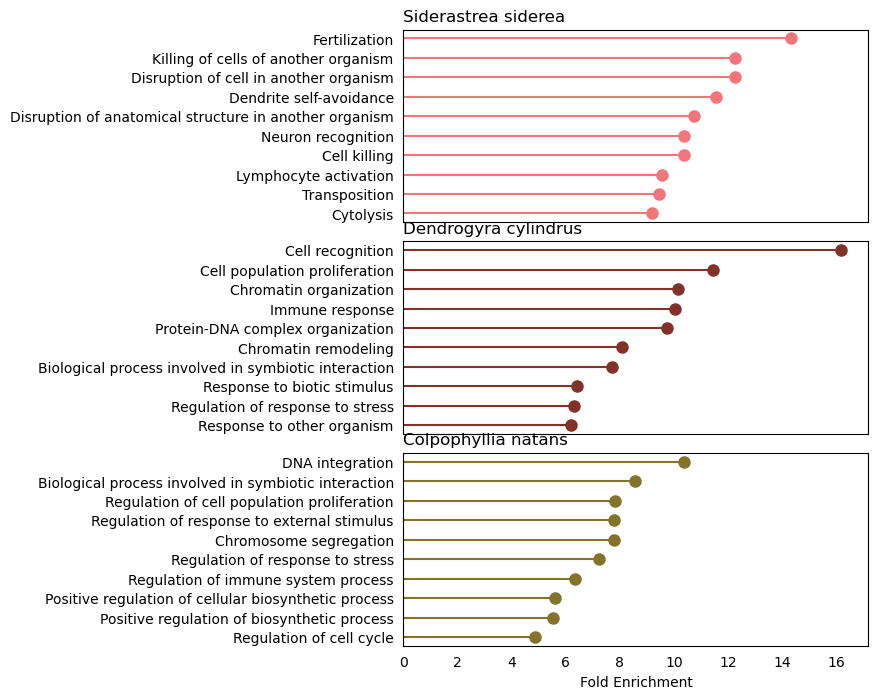

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42

figure, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

df = (bp_ssid[bp_ssid["enrichment"] == "e"]
                  [bp_ssid["depth"] > 1][bp_ssid["study_count"] > 5]
      .sort_values(by='fold_change', ascending = False).reset_index(drop=True).head(10)
     .sort_values(by="fold_change", ascending = True).reset_index(drop=True))
ordered_df = df.copy()
my_range=range(1,len(df.index)+1)
max1 = df["fold_change"].max()
ax1.hlines(y=my_range, xmin=0, xmax=ordered_df['fold_change'], color = "#EF767A")
ax1.plot(ordered_df['fold_change'], my_range, "o", markersize=8, color = "#EF767A")
ax1.set_yticks(my_range)
ax1.yaxis.set_ticks_position('none') 
ax1.xaxis.set_ticks_position('none') 
ax1.set_yticklabels([(i.strip().capitalize()
                      .replace("Dna", "DNA")
                      .replace("dna", "DNA")
                      .replace("Rna ", "RNA ")
                      .replace("rna ", "RNA ")) for i in ordered_df['name'].tolist()], ha="right")
ax1.set_title("Siderastrea siderea", loc='left')

df = (bp_dcyl[bp_dcyl["enrichment"] == "e"]
                  [bp_dcyl["depth"] > 1][bp_dcyl["study_count"] > 5]
      .sort_values(by='fold_change', ascending = False).reset_index(drop=True).head(10)
     .sort_values(by="fold_change", ascending = True).reset_index(drop=True))
ordered_df = df.copy()
my_range=range(1,len(df.index)+1)
max2 = df["fold_change"].max()
ax2.hlines(y=my_range, xmin=0, xmax=ordered_df['fold_change'], color = "#823329")
ax2.plot(ordered_df['fold_change'], my_range, "o", markersize=8, color = "#823329")
ax2.set_yticks(my_range)
ax2.yaxis.set_ticks_position('none') 
ax2.xaxis.set_ticks_position('none') 
ax2.set_yticklabels([(i.strip().capitalize()
                      .replace("Dna", "DNA")
                      .replace("dna", "DNA")
                      .replace("Rna ", "RNA ")
                      .replace("rna ", "RNA ")) for i in ordered_df['name'].tolist()], ha="right")
ax2.set_title("Dendrogyra cylindrus", loc='left')
# Add title and axis names

df = (bp_cnat[bp_cnat["enrichment"] == "e"]
                  [bp_cnat["depth"] > 1][bp_cnat["study_count"] > 5]
      .sort_values(by='fold_change', ascending = False).reset_index(drop=True).head(10)
     .sort_values(by="fold_change", ascending = True).reset_index(drop=True))
ordered_df = df.copy()
my_range=range(1,len(df.index)+1)
max3 = df["fold_change"].max()
ax3.hlines(y=my_range, xmin=0, xmax=ordered_df['fold_change'], color = "#84732B")
ax3.plot(ordered_df['fold_change'], my_range, "o", markersize=8, color = "#84732B")
ax3.set_yticks(my_range)
ax3.yaxis.set_ticks_position('none') 
ax3.xaxis.set_ticks_position('none') 
ax3.set_yticklabels([(i.strip().capitalize()
                      .replace("Dna", "DNA")
                      .replace("dna", "DNA")
                      .replace("Rna ", "RNA ")
                      .replace("rna ", "RNA ")) for i in ordered_df['name'].tolist()], ha="right")
ax3.set_title("Colpophyllia natans", loc='left')
# Add title and axis names

# Add title and axis names

plt.subplots_adjust(wspace=0, hspace=0.1)

plt.xlim(0, max([max1, max2, max3]) + 1)
plt.xlabel('Fold Enrichment')

# show the graph
plt.savefig("../figures/bp_go_enrichment.pdf", dpi = 300, bbox_inches='tight')